<a href="https://colab.research.google.com/github/lym0405/simple_homepage/blob/MA/%E1%84%8B%E1%85%A1%E1%86%AF%E1%84%80%E1%85%A9%E1%84%85%E1%85%B5%E1%84%83%E1%85%B3%E1%86%B7_%EA%B0%9C%EC%9D%B8%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 기간별 데이터 다운로드 및 준비

3년 및 10년 기간에 대한 신세계 및 S&P 500 데이터를 yfinance에서 다운로드 후, 기간별로 구분하여 저장.

In [11]:
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd

# 신세계, S&P 500
assets = ["004170.KS", "^GSPC"]

# 현재 날짜를 마지막 날로 지정
END = datetime.now()

# 기간 정의
time_periods = {
    '3y': END - timedelta(days=3*365), # 3년
    '10y': END - timedelta(days=10*365) # 10년
}

dataframes_by_period = {}

for period_name, start_date in time_periods.items():
    print(f"Downloading data for {period_name} period from {start_date.strftime('%Y-%m-%d')} to {END.strftime('%Y-%m-%d')}...")

    try:
        df = yf.download(assets, start=start_date, end=END, auto_adjust=True)

        dataframes_by_period[period_name] = df
        print(f"Data download for {period_name} completed.")

    except Exception as e:
        print(f"Error downloading data for {period_name}: {e}")
        dataframes_by_period[period_name] = pd.DataFrame()


print("\nData download for all specified periods completed.")

# 저장 내용 간단 확인 진행
print("\nHead of 3-year data:")
if '3y' in dataframes_by_period and not dataframes_by_period['3y'].empty:
    display(dataframes_by_period['3y'].head())
else:
    print("No 3-year data available.")

print("\nHead of 10-year data:")
if '10y' in dataframes_by_period and not dataframes_by_period['10y'].empty:
    display(dataframes_by_period['10y'].head())
else:
    print("No 10-year data available.")

[*********************100%***********************]  2 of 2 completed

Data download for 3y completed.



[*********************100%***********************]  2 of 2 completed

Data download for 10y completed.

Data download for all specified periods completed.

Head of 3-year data:


Price               Close                        High               \
Ticker          004170.KS        ^GSPC      004170.KS        ^GSPC   
Date                                                                 
2022-09-07  206266.515625  3979.870117  210922.644646  3987.889893   
2022-09-08  214647.531250  4006.179932  215113.144116  4010.500000   
2022-09-09            NaN  4067.360107            NaN  4076.810059   
2022-09-12            NaN  4110.410156            NaN  4119.279785   
2022-09-13  225822.250000  3932.689941  226287.862887  4037.120117   

Price                 Low                        Open                 Volume  \
Ticker          004170.KS        ^GSPC      004170.KS        ^GSPC 004170.KS   
Date                                                                           
2022-09-07  204869.676919  3906.030029  206732.128527  3909.429932   54862.0   
2022-09-08  208594.563991  3944.810059  209060.176857  3959.939941  107640.0   
2022-09-09            NaN  4022.939941            NaN  4022.939941       NaN   
2022-09-12            NaN  4083.669922            NaN  4083.669922       NaN   
2022-09-13  216509.992268  3921.280029  216975.605155  4037.120117  123672.0   

Price                     
Ticker             ^GSPC  
Date                      
2022-09-07  3.890320e+09  
2022-09-08  3.966850e+09  
2022-09-09  3.901940e+09  
2022-09-12  3.814200e+09  
2022-09-13  4.224550e+09


Head of 10-year data:


Price               Close                        High               \
Ticker          004170.KS        ^GSPC      004170.KS        ^GSPC   
Date                                                                 
2015-09-09  208917.250000  1942.040039  211572.977754  1988.630005   
2015-09-10  219540.125000  1952.290039  219540.125000  1965.290039   
2015-09-11  214228.687500  1961.050049  217769.657541  1961.050049   
2015-09-14  213343.453125  1953.030029  218212.287117  1963.060059   
2015-09-15  213343.453125  1978.089966  216884.423301  1983.189941   

Price                 Low                        Open                 Volume  \
Ticker          004170.KS        ^GSPC      004170.KS        ^GSPC 004170.KS   
Date                                                                           
2015-09-09  206261.522246  1937.880005  207146.764831  1971.449951   48142.0   
2015-09-10  207146.730847  1937.189941  208031.973286  1941.589966   52056.0   
2015-09-11  212015.581224  1939.189941  217769.657541  1951.449951   51822.0   
2015-09-14  208917.240405  1948.270020  215113.938213  1963.060059   50071.0   
2015-09-15  212015.589309  1954.300049  215556.559485  1955.099976   25569.0   

Price                     
Ticker             ^GSPC  
Date                      
2015-09-09  3.652120e+09  
2015-09-10  3.626320e+09  
2015-09-11  3.218590e+09  
2015-09-14  3.000200e+09  
2015-09-15  3.239860e+09

## 기간별 단순 이동평균 (SMA) 계산

3년 및 10년 기간의 가격 데이터에 대해 단순 이동평균(SMA)을 계산

In [12]:
sma_dfs_by_period = {}

for period in ['3y', '10y']:
    print(f"Calculating SMA for {period} period...")
    current_df = dataframes_by_period[period]['Close'].copy()

    # 상수 변환
    for col in current_df.columns:
        current_df[col] = pd.to_numeric(current_df[col], errors='coerce')

    # SMA 진행
    df_sma_period = current_df.copy()
    for col in assets:
        for w in [5, 20, 60]:
            df_sma_period[f"{col}_SMA_{w}"] = current_df[col].rolling(window=w, min_periods=1).mean()
    sma_dfs_by_period[period] = df_sma_period

print("\nSMA calculations completed for 3y and 10y periods.")

# 계산표
print("\nExample df_sma_period head (3y):")
display(sma_dfs_by_period['3y'].head())

Calculating SMA for 3y period...
Calculating SMA for 10y period...

SMA calculations completed for 3y and 10y periods.

Example df_sma_period head (3y):


Ticker,004170.KS,^GSPC,004170.KS_SMA_5,004170.KS_SMA_20,004170.KS_SMA_60,^GSPC_SMA_5,^GSPC_SMA_20,^GSPC_SMA_60
Date,,,,,,,,
2022-09-07,206266.515625,3979.870117,206266.515625,206266.515625,206266.515625,3979.870117,3979.870117,3979.870117
2022-09-08,214647.531250,4006.179932,210457.023438,210457.023438,210457.023438,3993.025024,3993.025024,3993.025024
2022-09-09,NaN,4067.360107,210457.023438,210457.023438,210457.023438,4017.803385,4017.803385,4017.803385
2022-09-12,NaN,4110.410156,210457.023438,210457.023438,210457.023438,4040.955078,4040.955078,4040.955078
2022-09-13,225822.250000,3932.689941,215578.765625,215578.765625,215578.765625,4019.302051,4019.302051,4019.302051


## 주가 및 거래량 이동평균 시각화 (기간별)

각 기간(3년, 10년) 및 자산별로 주가와 5일, 20일, 60일 이동평균을 상단 그래프에, 거래량 데이터를 하단 그래프에 함께 표시


Generating visualizations for 3y period...


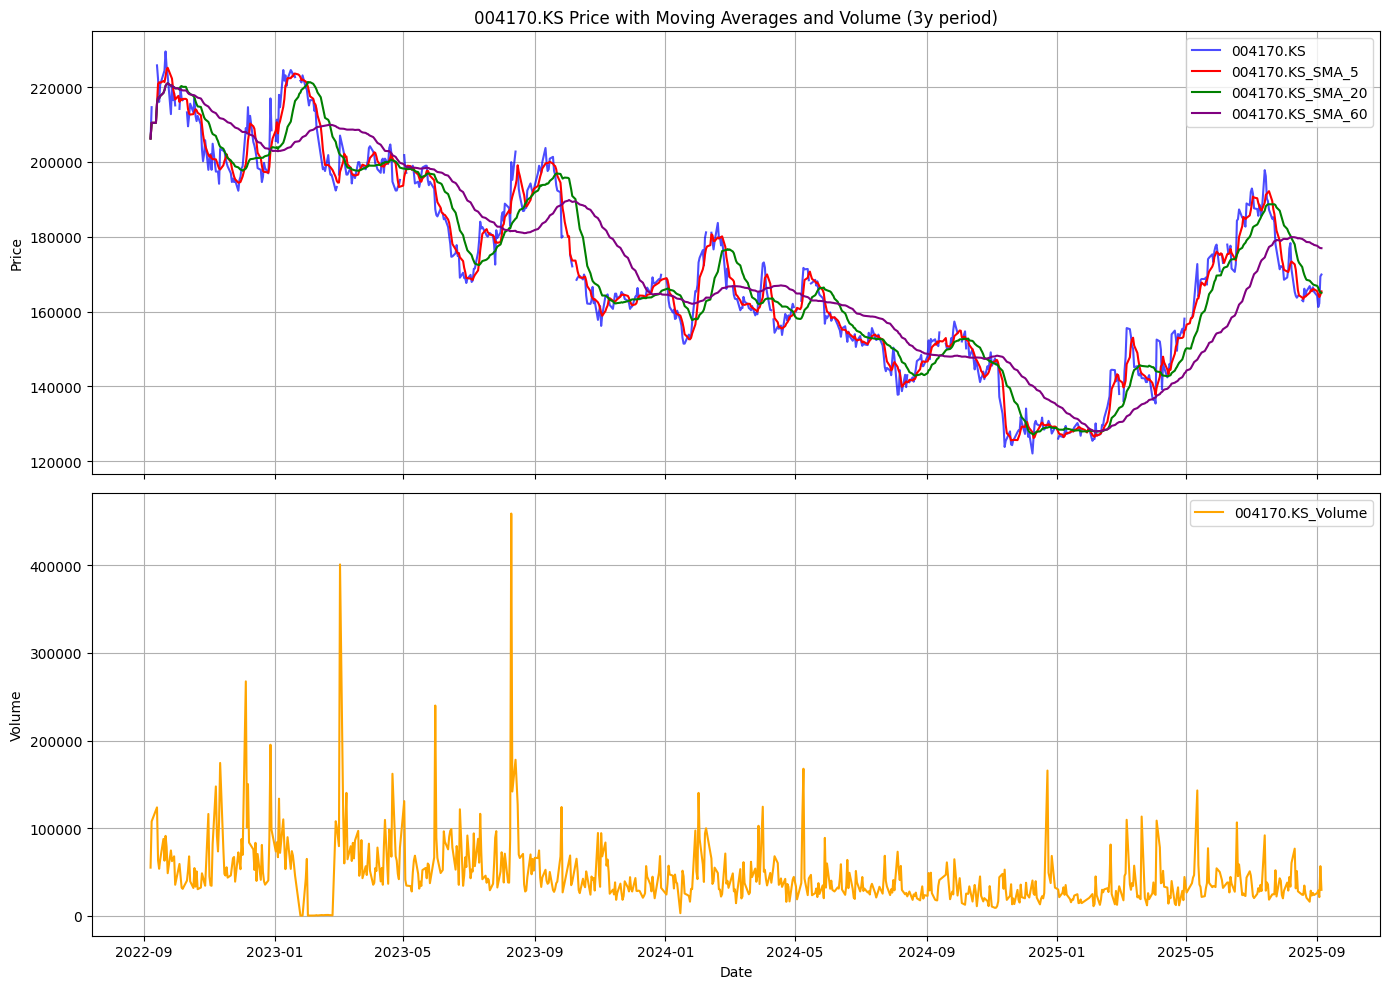

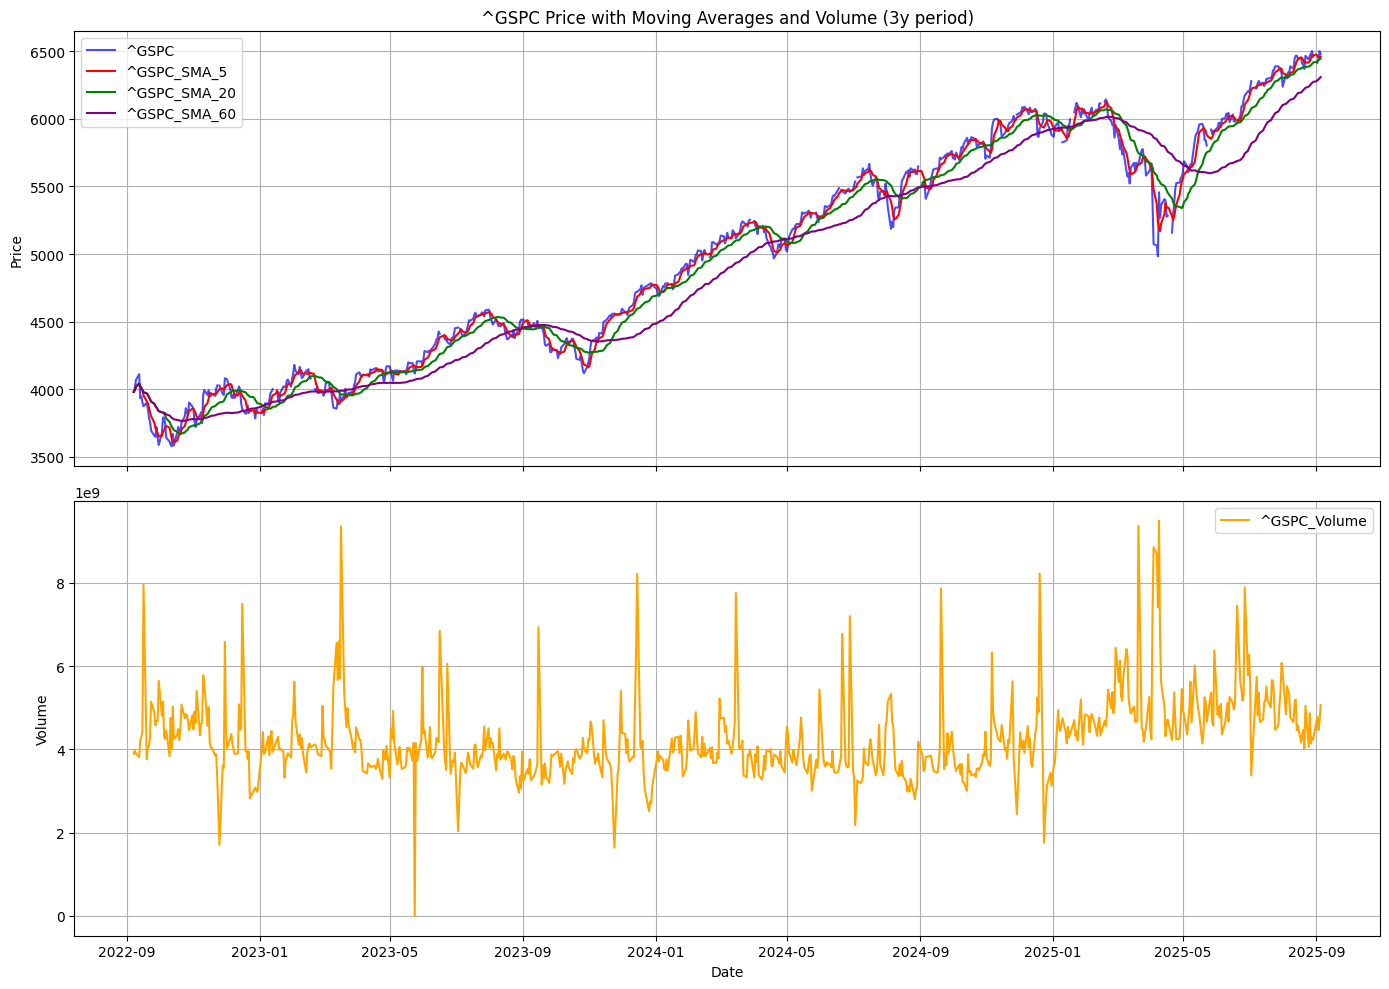

Generating visualizations for 10y period...


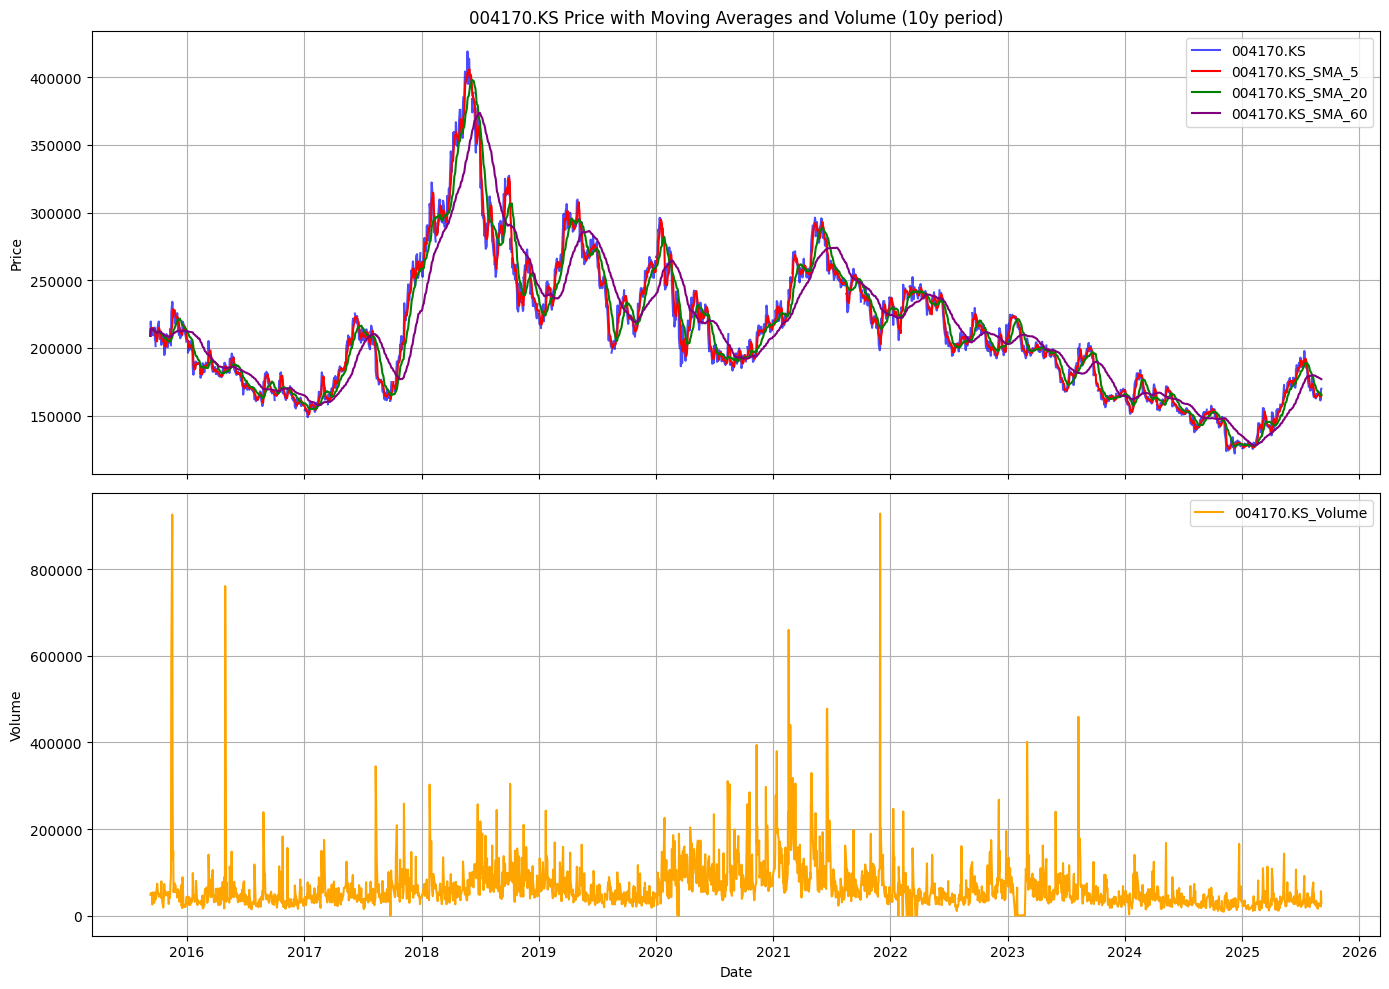

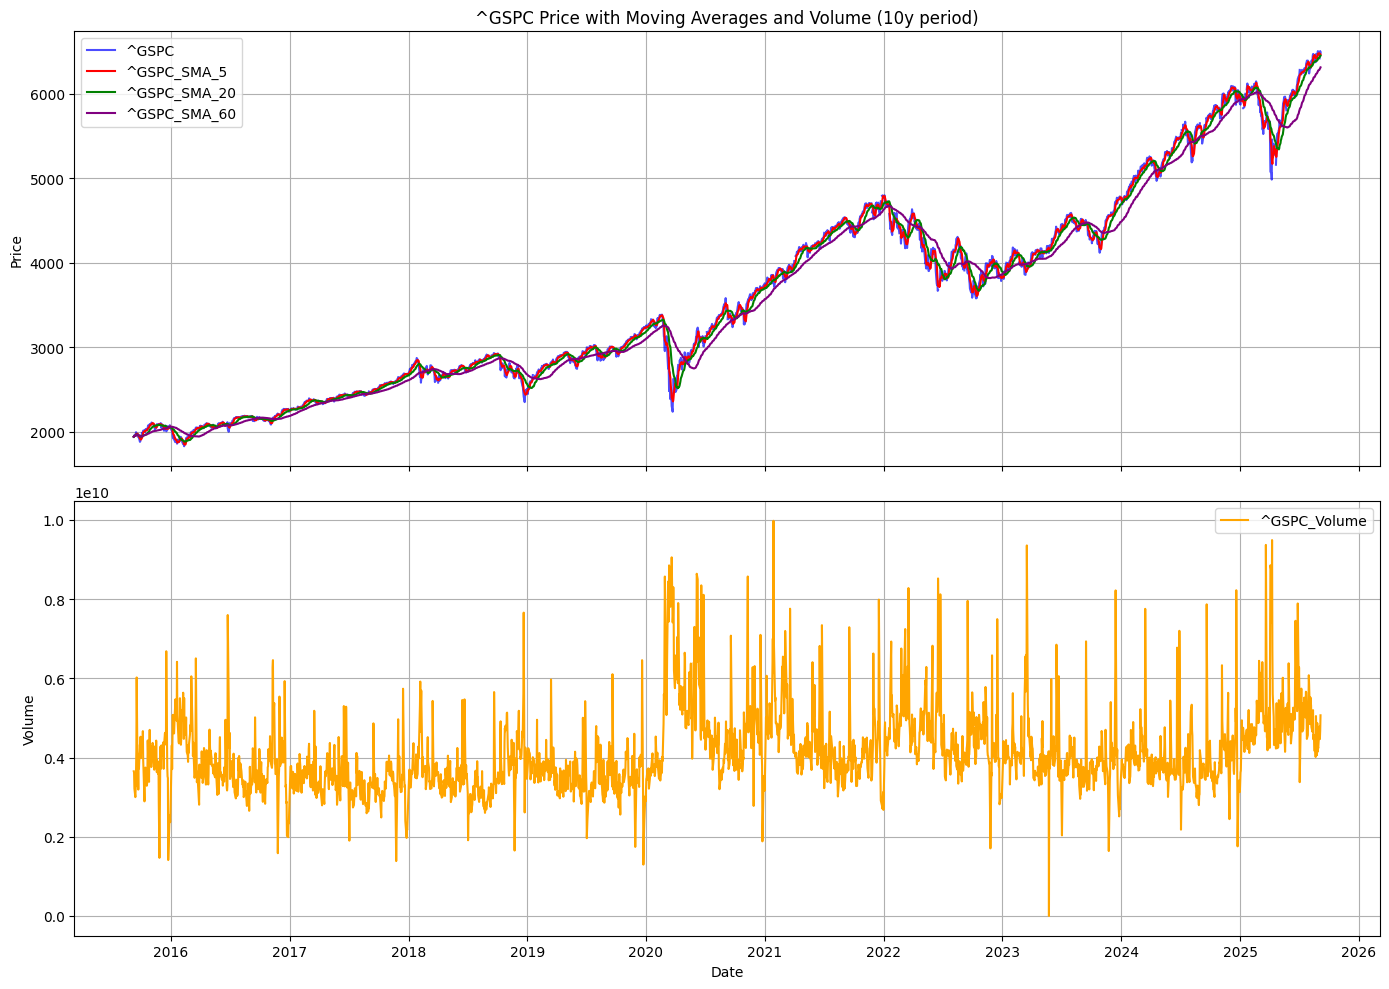

In [13]:
import matplotlib.pyplot as plt
import numpy as nd

for period in ['3y', '10y']:
    print(f"Generating visualizations for {period} period...")

    price_sma_df = sma_dfs_by_period[period]
    original_data_df = dataframes_by_period[period]

    if isinstance(original_data_df.columns, pd.MultiIndex):
        original_price_data = original_data_df['Close']
        original_volume_data = original_data_df['Volume']
    else:
        # Assume single level index with ticker as columns if not MultiIndex
        original_price_data = original_data_df[['004170.KS', '^GSPC']]
        original_volume_data = original_data_df[['004170.KS', '^GSPC']]


    for asset in assets:
        fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

        axes[0].plot(original_price_data.index, original_price_data[asset], label=asset, color='blue', alpha=0.7)
        axes[0].plot(price_sma_df.index, price_sma_df[f"{asset}_SMA_5"], label=f'{asset}_SMA_5', color='red')
        axes[0].plot(price_sma_df.index, price_sma_df[f"{asset}_SMA_20"], label=f'{asset}_SMA_20', color='green')
        axes[0].plot(price_sma_df.index, price_sma_df[f"{asset}_SMA_60"], label=f'{asset}_SMA_60', color='purple')
        axes[0].set_ylabel('Price')
        axes[0].set_title(f'{asset} Price with Moving Averages and Volume ({period} period)')
        axes[0].legend()
        axes[0].grid(True)

        # 아래에 거래량 그래프 추가
        volume_data = original_volume_data[asset].dropna()
        axes[1].plot(volume_data.index, volume_data, label=f'{asset}_Volume', color='orange')
        axes[1].set_ylabel('Volume')
        axes[1].set_xlabel('Date')
        axes[1].legend()
        axes[1].grid(True)

        plt.tight_layout()
        plt.show()

## 최적 조합 산출 시스템

분산과 편향을 계산한 점수를 바탕으로 경향을 가장 잘 반영하는 최적 조합을 산출


Calculating moving averages for 3y period...

Calculating moving averages for 10y period...

Moving average calculations completed for specified periods.

Calculated Metrics:


,Period,Asset,Type,MA_Type,MA_Column,Bias,Variance
0,3y,004170.KS,Price,SMA,004170.KS_SMA_5,-102.852427,1.045891e+07
1,3y,004170.KS,Price,SMA,004170.KS_SMA_20,-628.182724,4.767472e+07
2,3y,004170.KS,Price,SMA,004170.KS_SMA_60,-1777.215284,1.270128e+08
3,3y,^GSPC,Price,SMA,^GSPC_SMA_5,6.574564,2.916361e+03
4,3y,^GSPC,Price,SMA,^GSPC_SMA_20,29.632731,1.201381e+04
5,3y,^GSPC,Price,SMA,^GSPC_SMA_60,94.372607,3.149395e+04
6,3y,004170.KS,Price,WMA,004170.KS_WMA_5,-97.203099,6.069534e+06
7,3y,004170.KS,Price,WMA,004170.KS_WMA_20,-467.991961,3.133096e+07
8,3y,004170.KS,Price,WMA,004170.KS_WMA_60,-904.671490,8.975787e+07
9,3y,^GSPC,Price,WMA,^GSPC_WMA_5,4.285305,1.639158e+03



Metrics with calculated scores (3y and 10y periods):


,Period,Asset,Type,MA_Type,MA_Column,Bias,Variance,Bias_Normalized,Variance_Normalized,Score
0,3y,004170.KS,Price,SMA,004170.KS_SMA_5,-102.852427,1.045891e+07,0.998011,0.019618,0.491185
1,3y,004170.KS,Price,SMA,004170.KS_SMA_20,-628.182724,4.767472e+07,0.813043,0.185954,0.500502
2,3y,004170.KS,Price,SMA,004170.KS_SMA_60,-1777.215284,1.270128e+08,0.408469,0.540554,0.525488
3,3y,^GSPC,Price,SMA,^GSPC_SMA_5,6.574564,2.916361e+03,0.011560,0.025077,0.981681
4,3y,^GSPC,Price,SMA,^GSPC_SMA_20,29.632731,1.201381e+04,0.127998,0.203702,0.834150
5,3y,^GSPC,Price,SMA,^GSPC_SMA_60,94.372607,3.149395e+04,0.454918,0.586186,0.479448
6,3y,004170.KS,Price,WMA,004170.KS_WMA_5,-97.203099,6.069534e+06,1.000000,0.000000,0.500000
7,3y,004170.KS,Price,WMA,004170.KS_WMA_20,-467.991961,3.133096e+07,0.869446,0.112905,0.508824
8,3y,004170.KS,Price,WMA,004170.KS_WMA_60,-904.671490,8.975787e+07,0.715691,0.374044,0.455133
9,3y,^GSPC,Price,WMA,^GSPC_WMA_5,4.285305,1.639158e+03,0.000000,0.000000,1.000000



Optimal Moving Average Combination for Each Period and Asset (Excluding Trend Similarity):


,Period,Asset,MA_Column,Score
44,10y,004170.KS,004170.KS_EMA_60,0.544949
33,10y,^GSPC,^GSPC_WMA_5,1.000000
20,3y,004170.KS,004170.KS_EMA_60,0.533591
9,3y,^GSPC,^GSPC_WMA_5,1.000000



Summary of Optimal Moving Average Combinations (Excluding Trend Similarity):
The optimal moving average combinations based on Bias and Variance only are:


Period  Asset    
10y     004170.KS    004170.KS_EMA_60
        ^GSPC             ^GSPC_WMA_5
3y      004170.KS    004170.KS_EMA_60
        ^GSPC             ^GSPC_WMA_5
Name: MA_Column, dtype: object


Potential Reasons for the results:
- The optimal MAs are those that minimize a combination of bias and variance, weighted according to the 'weights' dictionary.
- Different assets and periods may exhibit different characteristics (e.g., volatility, trend strength) that favor different moving average types and periods.

Visualizing new optimal combinations:
Visualizing optimal combination for 004170.KS (10y period): 004170.KS_EMA_60


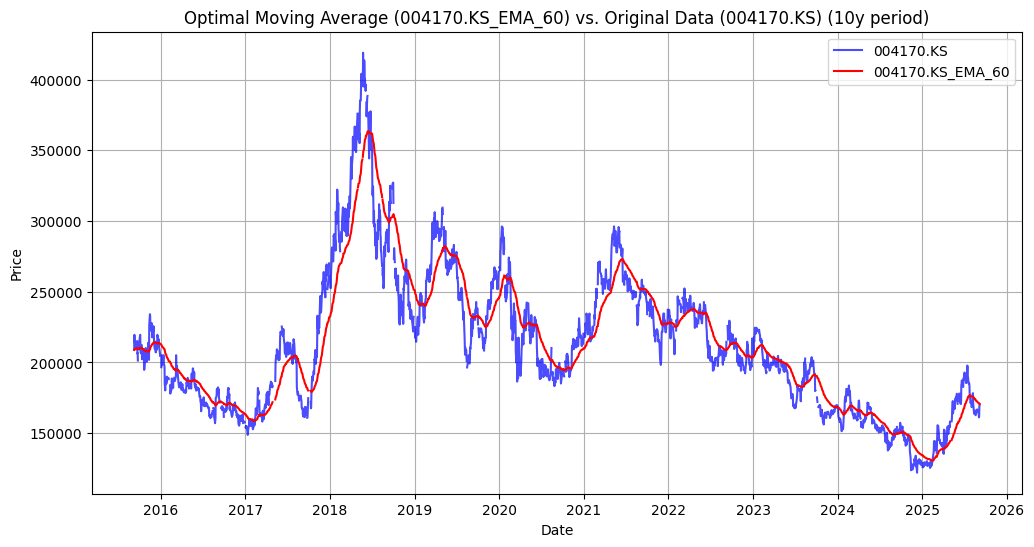

Visualizing optimal combination for ^GSPC (10y period): ^GSPC_WMA_5


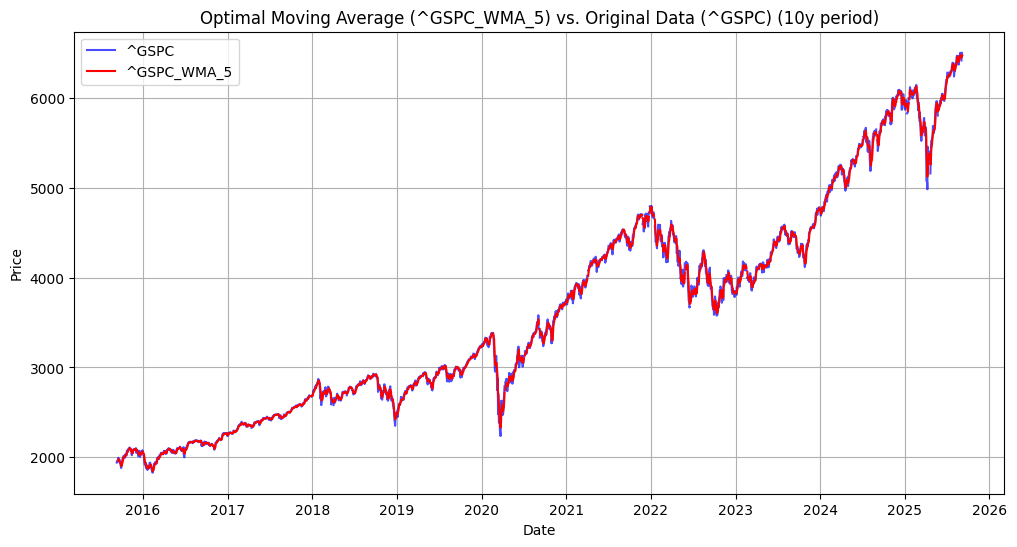

Visualizing optimal combination for 004170.KS (3y period): 004170.KS_EMA_60


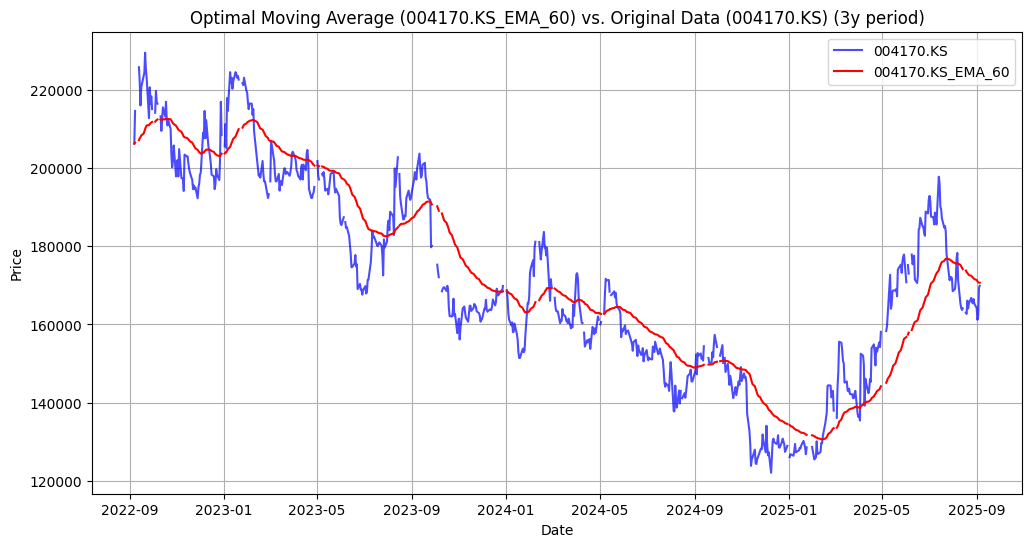

Visualizing optimal combination for ^GSPC (3y period): ^GSPC_WMA_5


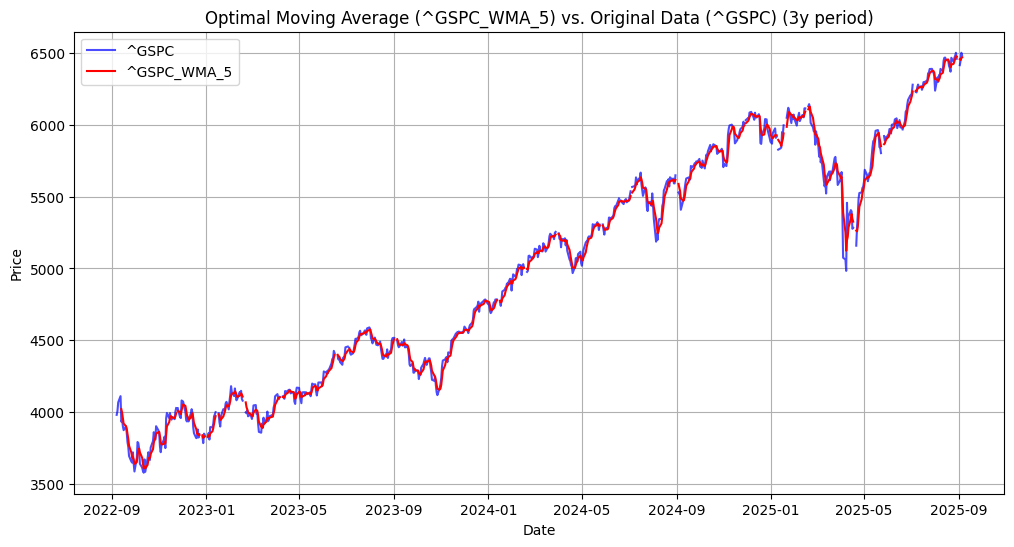

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as nd

# 신세계, S&P500
assets = ["004170.KS", "^GSPC"]

# 기간 정의
time_periods = ['3y', '10y']


# SMA, WMA, Smoothing MA, and EMA 기간별 계산
sma_dfs_by_period = {}
wma_dfs_by_period = {}
smoothing_dfs_by_period = {}
ema_dfs_by_period = {}

for period in time_periods:
    print(f"\nCalculating moving averages for {period} period...")
    if period not in dataframes_by_period or dataframes_by_period[period].empty:
        print(f"Data for {period} not found or empty. Skipping moving average calculations.")
        continue

    current_df = dataframes_by_period[period]['Close'].copy()

    # 상수 변환
    for col in current_df.columns:
        current_df[col] = pd.to_numeric(current_df[col], errors='coerce')

    # 1. SMA
    df_sma_period = current_df.copy()
    for col in assets:
        for w in [5, 20, 60]:
            df_sma_period[f"{col}_SMA_{w}"] = current_df[col].rolling(window=w, min_periods=1).mean()
    sma_dfs_by_period[period] = df_sma_period

    # 2. WMA
    df_wma_period = current_df.copy()
    for col in assets:
        for w in [5, 20, 60]:
            weights = nd.arange(1, w + 1)
            # Apply rolling calculation, dropping NaNs from the original data first for cleaner calculation
            df_wma_period[f"{col}_WMA_{w}"] = current_df[col].dropna().rolling(window=w).apply(lambda x: nd.dot(x, weights) / weights.sum(), raw=True)
    wma_dfs_by_period[period] = df_wma_period

    # 3. Smoothing MA
    df_smoothing_period = current_df.copy()
    for col in assets:
        for w in [5, 20, 60]:
             # Apply rolling calculation, dropping NaNs from the original data first for cleaner calculation
            df_smoothing_period[f"{col}_Smoothing_{w}"] = current_df[col].dropna().rolling(window=w).mean().ewm(span=w, adjust=False).mean()
    smoothing_dfs_by_period[period] = df_smoothing_period

    # 4. EMA
    df_ema_period = current_df.copy()
    for col in assets:
        for span in [5, 20, 60]:
             # Apply EWM calculation, dropping NaNs from the original data first for cleaner calculation
            df_ema_period[f"{col}_EMA_{span}"] = current_df[col].dropna().ewm(span=span, adjust=False).mean()
    ema_dfs_by_period[period] = df_ema_period

print("\nMoving average calculations completed for specified periods.")

metrics_list = []

# 진행할 이동평균 정리
price_ma_dfs_by_period = {'SMA': sma_dfs_by_period, 'WMA': wma_dfs_by_period, 'Smoothing': smoothing_dfs_by_period, 'EMA': ema_dfs_by_period}
price_cols = ['004170.KS', '^GSPC']

for period in time_periods:
    if period not in dataframes_by_period or dataframes_by_period[period].empty:
        print(f"Data for {period} not found or empty. Skipping metric calculations.")
        continue

    original_data_df_period = dataframes_by_period[period]['Close']
    for ma_type, ma_dfs_by_period_type in price_ma_dfs_by_period.items():
        if period not in ma_dfs_by_period_type:
             print(f"Moving average data for {ma_type} in {period} not found. Skipping metric calculations.")
             continue
        ma_df_period = ma_dfs_by_period_type[period]


        for original_col in price_cols:
            original_data = original_data_df_period[original_col]
            for ma_col in ma_df_period.columns:
                if ma_col.startswith(original_col) and f'_{ma_type}_' in ma_col:
                    ma_data = ma_df_period[ma_col]

                    # 편향 계산
                    bias = (original_data - ma_data).mean()

                    # 분산 계산
                    variance = (original_data - ma_data).var() if not (original_data - ma_data).dropna().empty else nd.nan

                    metrics_list.append({
                        'Period': period,
                        'Asset': original_col,
                        'Type': 'Price',
                        'MA_Type': ma_type,
                        'MA_Column': ma_col,
                        'Bias': bias,
                        'Variance': variance,
                    })

# 계산 결과 표 저장
metrics_df = pd.DataFrame(metrics_list)

# 각 이동평균 별 분산, 편향 산출 표
print("\nCalculated Metrics:")
display(metrics_df)


metrics_df_scored = metrics_df.copy()

weights = {'Bias': 0.5, 'Variance': 0.5} # 이후 목적에 따라 가중치 조정가능


for period in time_periods:
    for asset in ['004170.KS', '^GSPC']:
        subset = metrics_df_scored[(metrics_df_scored['Period'] == period) & (metrics_df_scored['Asset'] == asset)].copy()

        # 정규화한 분산과 편향 값을 사용, 0과 같은 이상값 처리
        if not subset['Bias'].dropna().empty:
            min_bias = subset['Bias'].min()
            max_bias = subset['Bias'].max()
            if max_bias - min_bias != 0:
                subset['Bias_Normalized'] = (subset['Bias'] - min_bias) / (max_bias - min_bias)
            else:
                subset['Bias_Normalized'] = 0.5 # Assign a neutral score if all values are the same
        else:
            subset['Bias_Normalized'] = nd.nan


        if not subset['Variance'].dropna().empty:
            min_variance = subset['Variance'].min()
            max_variance = subset['Variance'].max()
            if max_variance - min_variance != 0:
                subset['Variance_Normalized'] = (subset['Variance'] - min_variance) / (max_variance - min_variance)
            else:
                 subset['Variance_Normalized'] = 0.5 # Assign a neutral score if all values are the same
        else:
            subset['Variance_Normalized'] = nd.nan


        # Score = (1 - Bias_Normalized) * Bias_Weight + (1 - Variance_Normalized) * Variance_Weight : 점수 산출 방식
        subset['Score'] = (1 - subset['Bias_Normalized'].fillna(0)) * weights['Bias'] + \
                          (1 - subset['Variance_Normalized'].fillna(0)) * weights['Variance']


        # 데이터프레임 열 업데이트
        metrics_df_scored.loc[subset.index, 'Bias_Normalized'] = subset['Bias_Normalized']
        metrics_df_scored.loc[subset.index, 'Variance_Normalized'] = subset['Variance_Normalized']
        metrics_df_scored.loc[subset.index, 'Score'] = subset['Score']


# 산출된 점수표 출력
print("\nMetrics with calculated scores (3y and 10y periods):")
display(metrics_df_scored)

# Update the metrics_df to include the scores
metrics_df = metrics_df_scored


# 최적 조합 산출
optimal_combinations_excluding_trend = metrics_df.loc[metrics_df.groupby(['Period', 'Asset'])['Score'].idxmax()]

# 최적 조합 출력
print("\nOptimal Moving Average Combination for Each Period and Asset (Excluding Trend Similarity):")
display(optimal_combinations_excluding_trend[['Period', 'Asset', 'MA_Column', 'Score']])

print("\nSummary of Optimal Moving Average Combinations (Excluding Trend Similarity):")
print("The optimal moving average combinations based on Bias and Variance only are:")
display(optimal_combinations_excluding_trend.set_index(['Period', 'Asset'])['MA_Column'])

print("\nPotential Reasons for the results:")
print("- The optimal MAs are those that minimize a combination of bias and variance, weighted according to the 'weights' dictionary.")
print("- Different assets and periods may exhibit different characteristics (e.g., volatility, trend strength) that favor different moving average types and periods.")


# 최적 조합 시각화
print("\nVisualizing new optimal combinations:")
for index, optimal_combination in optimal_combinations_excluding_trend.iterrows():
    period = optimal_combination['Period']
    asset = optimal_combination['Asset']
    data_type = optimal_combination['Type']
    ma_type = optimal_combination['MA_Type']
    ma_column = optimal_combination['MA_Column']

    print(f"Visualizing optimal combination for {asset} ({period} period): {ma_column}")

    # raw data 출력
    if data_type == 'Price':
        if period not in dataframes_by_period or dataframes_by_period[period].empty:
            print(f"Original data for {period} not found or empty. Skipping visualization.")
            continue
        original_data = dataframes_by_period[period]['Close'][asset]
        y_label = 'Price'
        # 최적 조합 출력
        if ma_type == 'SMA':
             if period not in sma_dfs_by_period:
                print(f"SMA data for {period} not found. Skipping visualization.")
                continue
             ma_data = sma_dfs_by_period[period][ma_column]
        elif ma_type == 'WMA':
             if period not in wma_dfs_by_period:
                print(f"WMA data for {period} not found. Skipping visualization.")
                continue
             ma_data = wma_dfs_by_period[period][ma_column]
        elif ma_type == 'Smoothing':
             if period not in smoothing_dfs_by_period:
                print(f"Smoothing data for {period} not found. Skipping visualization.")
                continue
             ma_data = smoothing_dfs_by_period[period][ma_column]
        elif ma_type == 'EMA':
             if period not in ema_dfs_by_period:
                print(f"EMA data for {period} not found. Skipping visualization.")
                continue
             ma_data = ema_dfs_by_period[period][ma_column]
        else:
            raise ValueError(f"Unknown MA Type: {ma_type}")

    else:
        raise ValueError(f"Unknown Data Type: {data_type}")


    plt.figure(figsize=(12, 6))

    # raw data plot
    plt.plot(original_data.index, original_data, label=asset, color='blue', alpha=0.7)
    plt.plot(ma_data.index, ma_data, label=ma_column, color='red')

    plt.title(f'Optimal Moving Average ({ma_column}) vs. Original Data ({asset}) ({period} period)')
    plt.xlabel('Date')
    plt.ylabel(y_label)

    plt.legend()

    plt.grid(True)

    plt.show()